# Thera Bank Personal Loan Campaign

## Context 
This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with a minimal budget.

## Objective
The classification goal is to predict the likelihood of a liability customer buying personal loans.

## Attribute Information:
- ID: Customer ID
- Age: Customer's age in completed years
- Experience: #years of professional experience
- Income: Annual income of the customer
- ZIP Code: Home Address ZIP
- Family: Family size of the customer
- CCAvg: Avg. spending on credit cards per month
- Education: Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
- Mortgage: Value of house mortgage if any.
- Personal Loan: Did this customer accept the personal loan offered in the last campaign?
- Securities Account: Does the customer have a securities account with the bank?
- CD Account: Does the customer have a certificate of deposit (CD) account with the bank?
- Online: Does the customer use internet banking facilities?

Github Link: https://github.com/deepak-padmanabhan/PGP-AIML

#### 1. Import the datasets and libraries, check datatype, statistical summary, shape, null values or incorrect imputation.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Remove scientific notations and display numbers with 2 decimal points instead
pd.options.display.float_format = '{:,.2f}'.format

from sklearn.linear_model import LogisticRegression
#Sklearn package's data splitting function which is based on random function
from sklearn.model_selection import train_test_split
# calculate accuracy measures and confusion matrix
from sklearn import metrics
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score, classification_report
import statsmodels.api as sm
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [127]:
#Load Dataset
df = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

In [102]:
#Print header of the file
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.60,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.50,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.00,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.70,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.00,2,0,0,0,0,0,1


In [254]:
#Check DataTypes
df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

###### Insights: 
- Family and Education have ordinal data 
- Personal Loan, Securities Account, CD Account, Online, and Credit Card have categorical data
- CCAvg column has a float datatype
- The remaining columns (ID, Age, Experience Income, ZIP Code, Mortgage) contain integer numeric values

In [255]:
#Check Shape
df.shape

(5000, 14)

###### Insights: The dataset contains 5000 rows and 14 columns.

In [256]:
#Statistical Summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,"5,000.00","2,500.50","1,443.52",1.00,"1,250.75","2,500.50","3,750.25","5,000.00"
Age,"5,000.00",45.34,11.46,23.00,35.00,45.00,55.00,67.00
Experience,"5,000.00",20.10,11.47,-3.00,10.00,20.00,30.00,43.00
Income,"5,000.00",73.77,46.03,8.00,39.00,64.00,98.00,224.00
ZIP Code,"5,000.00","93,152.50","2,121.85","9,307.00","91,911.00","93,437.00","94,608.00","96,651.00"
Family,"5,000.00",2.40,1.15,1.00,1.00,2.00,3.00,4.00
CCAvg,"5,000.00",1.94,1.75,0.00,0.70,1.50,2.50,10.00
Education,"5,000.00",1.88,0.84,1.00,1.00,2.00,3.00,3.00
Mortgage,"5,000.00",56.50,101.71,0.00,0.00,0.00,101.00,635.00
Personal Loan,"5,000.00",0.10,0.29,0.00,0.00,0.00,0.00,1.00


In [257]:
df['Experience'].unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, -1, 34,  0, 38, 40, 33,  4, -2, 42, -3, 43], dtype=int64)

###### Insights: 
- Personal Loan, Securities Account, CD Account, Online, Credit Card have values 0 and 1, 
- Experience has negative values (-1,-2,-3)

In [258]:
df['Experience'].value_counts()

 32    154
 20    148
 9     147
 5     146
 23    144
 35    143
 25    142
 28    138
 18    137
 19    135
 26    134
 24    131
 3     129
 14    127
 16    127
 30    126
 34    125
 27    125
 17    125
 29    124
 22    124
 7     121
 8     119
 6     119
 15    119
 10    118
 33    117
 13    117
 11    116
 37    116
 36    114
 21    113
 4     113
 31    104
 12    102
 38     88
 39     85
 2      85
 1      74
 0      66
 40     57
 41     43
-1      33
-2      15
 42      8
-3       4
 43      3
Name: Experience, dtype: int64

In [259]:
# As experience cannot be negative, converting negative values (-1, -2, -3) to positive using the abs function
df['Experience'] = df['Experience'].abs()  

In [260]:
df['Experience'].unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, 34,  0, 38, 40, 33,  4, 42, 43], dtype=int64)

In [261]:
#Check for null or missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [262]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [263]:
df.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

###### Insights: There are no missing or null values in the dataset

#### 2. EDA: Study the data distribution in each attribute and target variable, share your findings (20 marks)

In [264]:
#Unique values in each column
df.nunique()

ID                    5000
Age                     45
Experience              44
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

###### Insights: 
- Personal Loan, Securities Account, CD Account, Online, and Credit Card has two unique values
- Family has 4 and Education has 3 unique values
- Loan ID will be dropped as part of data prep for logistic regression 

In [265]:
#Number of people with zero mortgage?
len(df[df['Mortgage'] == 0])

3462

In [266]:
#Number of people with zero credit card spending per month?
len(df[df['CCAvg'] == 0])

106

In [267]:
#Value counts of all categorical columns.
for i in ['Family','Education','Personal Loan','Securities Account','CD Account','Online','CreditCard']:
    print(df[i].value_counts())

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64
1    2096
3    1501
2    1403
Name: Education, dtype: int64
0    4520
1     480
Name: Personal Loan, dtype: int64
0    4478
1     522
Name: Securities Account, dtype: int64
0    4698
1     302
Name: CD Account, dtype: int64
1    2984
0    2016
Name: Online, dtype: int64
0    3530
1    1470
Name: CreditCard, dtype: int64


###### Insights: 
- More number of customers without Personal Loan, Securities Account and Credit Card

In [268]:
#Value counts of all categorical columns.Normalized
for i in ['Family','Education','Personal Loan','Securities Account','CD Account','Online','CreditCard']:
    print(df[i].value_counts(normalize = True))

1   0.29
2   0.26
4   0.24
3   0.20
Name: Family, dtype: float64
1   0.42
3   0.30
2   0.28
Name: Education, dtype: float64
0   0.90
1   0.10
Name: Personal Loan, dtype: float64
0   0.90
1   0.10
Name: Securities Account, dtype: float64
0   0.94
1   0.06
Name: CD Account, dtype: float64
1   0.60
0   0.40
Name: Online, dtype: float64
0   0.71
1   0.29
Name: CreditCard, dtype: float64


#### Univariate Analysis

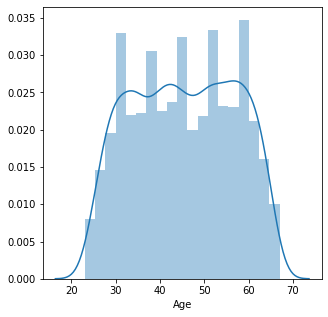

Skewness of Data:  -0.02934068151284029


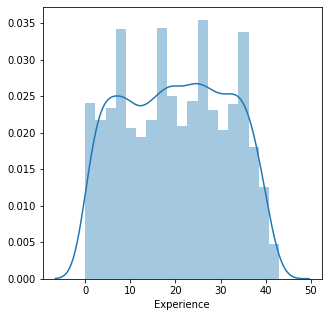

Skewness of Data:  -0.010037994995886824


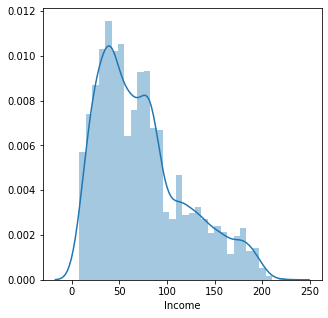

Skewness of Data:  0.8413386072610816


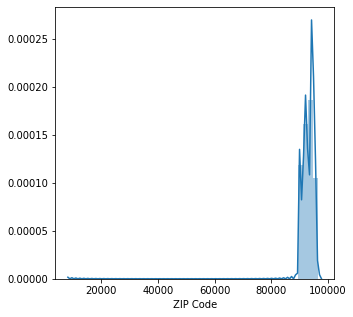

Skewness of Data:  -12.500221098132892


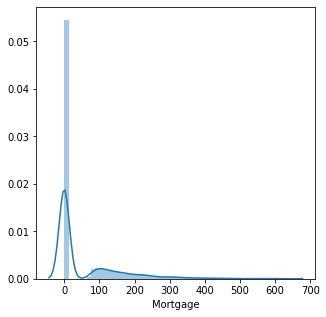

Skewness of Data:  2.1040023191079444


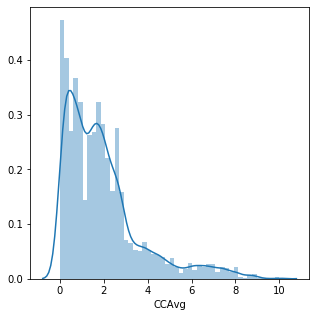

Skewness of Data:  1.5984433366678663


In [269]:
#Univariate Analysis - Distribution and Skewness of Experience, Income, ZIP Code, and Mortgage Columns
for i in ['Age','Experience','Income','ZIP Code','Mortgage', 'CCAvg']:
    plt.figure(figsize = (5,5))
    sns.distplot(df[i])
    plt.show()
    print('Skewness of Data: ',df[i].skew())

In [270]:
df.skew()

ID                     0.00
Age                   -0.03
Experience            -0.01
Income                 0.84
ZIP Code             -12.50
Family                 0.16
CCAvg                  1.60
Education              0.23
Mortgage               2.10
Personal Loan          2.74
Securities Account     2.59
CD Account             3.69
Online                -0.39
CreditCard             0.90
dtype: float64

###### Insights: 
- Age and Experience appear to be normally distributed
- Income is right skewed. Most of the customers have less than 50K income
- Mortage are heavily right skewed. Most of the customers do not have a mortgage 
- ZIP Code is left skewed 
- Most of the customers have less than 2.5K average Credit Card balance

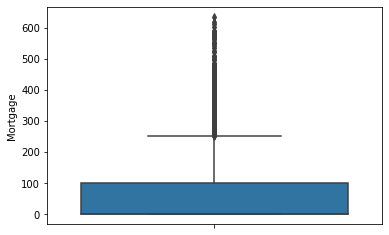

In [271]:
sns.boxplot(df['Mortgage'],orient='v')
plt.show()

###### Insights: Mortgage has a large number of outlier values. 

#### Bivariate Analysis

In [272]:
#Bivariate Analysis - Grouping by the target column which is 'Personal Loan' to understand how the data is distributed amongst the various values
df.groupby(["Personal Loan"]).mean()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,,,
0,"2,512.17",45.37,20.17,66.24,"93,152.43",2.37,1.73,1.84,51.79,0.10,0.04,0.60,0.29
1,"2,390.65",45.07,19.84,144.75,"93,153.20",2.61,3.91,2.23,100.85,0.12,0.29,0.61,0.30


In [273]:
#Bivariate Analysis - Grouping by the target column which is 'Personal Loan' to understand how the data is distributed amongst the various values
df.groupby(["Personal Loan"]).median()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,,,
0,"2,518.50",45.00,20.00,59.00,"93,437.00",2.00,1.40,2.00,0.00,0.00,0.00,1.00,0.00
1,"2,342.00",45.00,20.00,142.50,"93,407.00",3.00,3.80,2.00,0.00,0.00,0.00,1.00,0.00


###### Insights: 
- No major difference in case of ID, Age, Experience, ZIP Code, Securities Account, Online, and Credit Card values w.r.t. target variable Personal Loan
- Customers who spend more using credit cards have a higher possibility of taking personal loans
- Customers with higher income have a higher possibility of taking personal loans

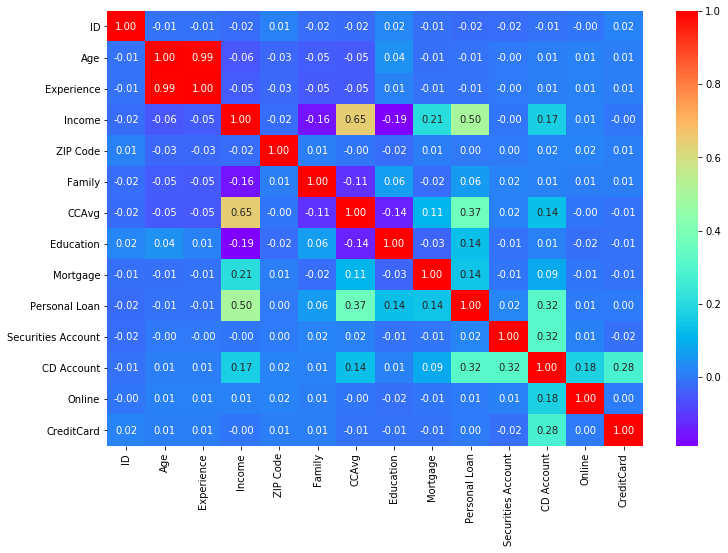

In [274]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,fmt='.2f',cmap='rainbow', )
plt.show()

In [275]:
df[df.columns[:]].corr()['Personal Loan'][:]

ID                   -0.02
Age                  -0.01
Experience           -0.01
Income                0.50
ZIP Code              0.00
Family                0.06
CCAvg                 0.37
Education             0.14
Mortgage              0.14
Personal Loan         1.00
Securities Account    0.02
CD Account            0.32
Online                0.01
CreditCard            0.00
Name: Personal Loan, dtype: float64

###### Insights: 
- Personal Loan is highly correlated with Income, CCAvg, and CD Account
- Experience is highly correlated with Age.
- Income is highly correlated with CCAvg

In [276]:
pd.crosstab(df['CD Account'],df['Personal Loan'],normalize="columns")

Personal Loan,0,1
CD Account,,
0,0.96,0.71
1,0.04,0.29


###### Insights: Customers with CD Accounts seems to have a higher probability of buying personal loans 

In [277]:
pd.crosstab(df['Family'],df['Personal Loan'], normalize="columns")

Personal Loan,0,1
Family,,
1,0.30,0.22
2,0.26,0.22
3,0.19,0.28
4,0.24,0.28


###### Insights: The number of family members does not result in personal loan acceptance

In [278]:
pd.crosstab(df['Education'],df['Personal Loan'],normalize="columns")

Personal Loan,0,1
Education,,
1,0.44,0.19
2,0.27,0.38
3,0.29,0.43


###### Insights: Customers with Graduate/Advanced/Professional education level has higher personal loan acceptance 

In [279]:
pd.crosstab(df['CreditCard'],df['Personal Loan'],normalize="columns")

Personal Loan,0,1
CreditCard,,
0,0.71,0.70
1,0.29,0.30


###### Insights: Customers who use or do not use credit cards does not seem to effect the probability of buying personal loans 

In [280]:
pd.crosstab(df['Securities Account'],df['Personal Loan'],normalize="columns")

Personal Loan,0,1
Securities Account,,
0,0.90,0.88
1,0.10,0.12


###### Insights: Customers who use or do not use securities account does not seem to effect the probability of buying personal loans 

In [281]:
pd.crosstab(df['Online'],df['Personal Loan'],normalize="columns")

Personal Loan,0,1
Online,,
0,0.40,0.39
1,0.60,0.61


###### Insights: Customers who use or do not use online banking does not seem to effect the probability of buying personal loans 

#### Separate dependent and independent variables

In [128]:
# Masking the values of Mortgage as 0 and 1 for easier analysis
df['Mortgage'].mask(df['Mortgage'] > 0,1,inplace = True)
df['Mortgage'].unique()

array([0, 1], dtype=int64)

In [129]:
#Changing the datatype of Family, Education, Mortgage, Personal Loan to category
df['Family'] = df['Family'].astype('category')
df['Education'] = df['Education'].astype('category')
df['Mortgage'] = df['Mortgage'].astype('category')
df['Personal Loan'] = df['Personal Loan'].astype('category')

In [131]:
#Dropping the independent columns ID, ZIP Code,Experience and the target Personal Loan column
#ID and ZIP Code are just numbers; Experience has a high correlation with Age so dropping it and also it had some negative numbers which was replaced by absolute values 
X = df.drop(["ID", "ZIP Code", "Experience", "Personal Loan"],axis=1)
Y = df["Personal Loan"]

In [132]:
X.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.60,1,0,1,0,0,0
1,45,34,3,1.50,1,0,1,0,0,0
2,39,11,1,1.00,1,0,0,0,0,0
3,35,100,1,2.70,2,0,0,0,0,0
4,35,45,4,1.00,2,0,0,0,0,1


In [133]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Personal Loan, dtype: category
Categories (2, int64): [0, 1]

In [134]:
#Convert categorical variables to dummy variables
X = pd.get_dummies(X, drop_first=True)

In [135]:
X.dtypes

Age                     int64
Income                  int64
CCAvg                 float64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
Family_2                uint8
Family_3                uint8
Family_4                uint8
Education_2             uint8
Education_3             uint8
Mortgage_1              uint8
dtype: object

#### 3. Split the data into training and test set in the ratio of 70:30 respectively (5 marks)

In [136]:
# Spilting the data into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = 1)
X_train.head()

,Age,Income,CCAvg,Securities Account,CD Account,Online,CreditCard,Family_2,Family_3,Family_4,Education_2,Education_3,Mortgage_1
1334,47,35,1.30,0,0,1,0,1,0,0,0,0,0
4768,38,39,2.00,0,0,1,0,0,0,0,1,0,0
65,59,131,3.80,0,0,1,1,0,0,0,0,0,0
177,29,65,1.80,0,0,0,0,0,0,1,1,0,1
4489,39,21,0.20,0,0,1,0,0,1,0,1,0,0


In [137]:
print("{0:0.2f}% data is in training set".format((len(X_train)/len(df.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(df.index)) * 100))

70.00% data is in training set
30.00% data is in test set


In [138]:
print("Original Personal Loan True Values    : {0} ({1:0.2f}%)".format(len(df.loc[df['Personal Loan'] == 1]), (len(df.loc[df['Personal Loan'] == 1])/len(df.index)) * 100))
print("Original Personal Loan False Values   : {0} ({1:0.2f}%)".format(len(df.loc[df['Personal Loan'] == 0]), (len(df.loc[df['Personal Loan'] == 0])/len(df.index)) * 100))
print("")
print("Training Personal Loan True Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Personal Loan False Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test Personal Loan True Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Personal Loan False Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Original Personal Loan True Values    : 480 (9.60%)
Original Personal Loan False Values   : 4520 (90.40%)

Training Personal Loan True Values    : 331 (9.46%)
Training Personal Loan False Values   : 3169 (90.54%)

Test Personal Loan True Values        : 149 (9.93%)
Test Personal Loan False Values       : 1351 (90.07%)



In [140]:
X_train.head()

,Age,Income,CCAvg,Securities Account,CD Account,Online,CreditCard,Family_2,Family_3,Family_4,Education_2,Education_3,Mortgage_1
1334,47,35,1.30,0,0,1,0,1,0,0,0,0,0
4768,38,39,2.00,0,0,1,0,0,0,0,1,0,0
65,59,131,3.80,0,0,1,1,0,0,0,0,0,0
177,29,65,1.80,0,0,0,0,0,0,1,1,0,1
4489,39,21,0.20,0,0,1,0,0,1,0,1,0,0


In [141]:
X_test.head()

,Age,Income,CCAvg,Securities Account,CD Account,Online,CreditCard,Family_2,Family_3,Family_4,Education_2,Education_3,Mortgage_1
2764,31,84,2.90,0,0,0,1,0,0,0,0,1,1
4767,35,45,0.90,1,0,0,0,0,1,0,0,0,1
3814,34,35,1.30,0,0,0,0,0,1,0,0,0,0
3499,49,114,0.30,0,0,1,0,0,0,0,0,0,1
2735,36,70,2.60,0,0,1,0,0,1,0,1,0,1


#### 4. 
- Use the Logistic Regression model to predict whether the customer will take a personal loan or not. 
- Print all the metrics related to evaluating the model performance (accuracy, recall, precision, f1score, and roc_auc_score)
- Draw a heatmap to display confusion matrix (15 marks)

In [142]:
#Fit the model on train data 
lr = LogisticRegression(random_state=1)
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [143]:
#Predicting target variable on test data
y_predicted =  lr.predict(X_test)
y_predicted

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [144]:
# Observe the predicted and observed classes in a dataframe.
z = X_test.copy()
z['Observed Personal Loan Status'] = y_test
z['Probaility that output is 0'] = lr.predict_proba(X_test)[:,0]
z['Probaility that output is 1'] = lr.predict_proba(X_test)[:,1]
z['Predicted Personal Loan Status'] = y_predicted

z.head()

,Age,Income,CCAvg,Securities Account,CD Account,Online,CreditCard,Family_2,Family_3,Family_4,Education_2,Education_3,Mortgage_1,Observed Personal Loan Status,Probaility that output is 0,Probaility that output is 1,Predicted Personal Loan Status
2764,31,84,2.90,0,0,0,1,0,0,0,0,1,1,0,0.97,0.03,0
4767,35,45,0.90,1,0,0,0,0,1,0,0,0,1,0,1.00,0.00,0
3814,34,35,1.30,0,0,0,0,0,1,0,0,0,0,0,1.00,0.00,0
3499,49,114,0.30,0,0,1,0,0,0,0,0,0,1,0,1.00,0.00,0
2735,36,70,2.60,0,0,1,0,0,1,0,1,0,1,0,0.90,0.10,0


#### Determine Model Accuracy

In [145]:
print( 'Total Accuracy : ',np.round( accuracy_score( y_test, lr.predict(X_test) ), 2 ) )

Total Accuracy :  0.95


#### Building Confusion Matrix

In [146]:
## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

Training accuracy 0.9617142857142857

Testing accuracy 0.9546666666666667

Confusion Matrix


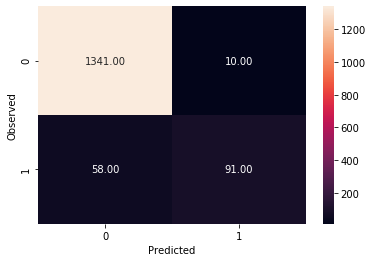

None

Recall: 0.610738255033557

Precision: 0.900990099009901

F1 Score: 0.7280000000000001

Roc Auc Score: 0.8016681652665933


In [147]:
print("Training accuracy",lr.score(X_train,y_train))  
print()
print("Testing accuracy",lr.score(X_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predicted))
print()
print("Recall:",recall_score(y_test,y_predicted))
print()
print("Precision:",precision_score(y_test,y_predicted))
print()
print("F1 Score:",f1_score(y_test,y_predicted))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predicted))

In [148]:
print(classification_report(y_test, y_predicted, labels=[1, 0]))

              precision    recall  f1-score   support

           1       0.90      0.61      0.73       149
           0       0.96      0.99      0.98      1351

    accuracy                           0.95      1500
   macro avg       0.93      0.80      0.85      1500
weighted avg       0.95      0.95      0.95      1500



#### 5. 
- Find out coefficients of all the attributes and show the output in a data frame with column names
- For test data show all the rows where the predicted class is not equal to the observed class. (10 marks)

In [149]:
## Displaying the coefficients of all the attributes in a data frame with column names 
fi = pd.DataFrame()
fi['Col'] = X_train.columns
fi['Coeff'] = np.round(abs(lr.coef_[0]),2)
fi.sort_values(by='Coeff',ascending=False)

,Col,Coeff
4,CD Account,3.61
11,Education_3,3.55
10,Education_2,3.32
8,Family_3,2.06
3,Securities Account,1.61
9,Family_4,1.43
6,CreditCard,0.83
5,Online,0.48
2,CCAvg,0.21
12,Mortgage_1,0.19


In [152]:
# For test data showing all the rows where the predicted class is not equal to the observed class. 68 rows are not equal
z[z['Observed Personal Loan Status'] != z['Predicted Personal Loan Status']]

,Age,Income,CCAvg,Securities Account,CD Account,Online,CreditCard,Family_2,Family_3,Family_4,Education_2,Education_3,Mortgage_1,Observed Personal Loan Status,Probaility that output is 0,Probaility that output is 1,Predicted Personal Loan Status
932,51,112,1.80,1,1,1,1,0,1,0,1,0,0,0,0.28,0.72,1
3347,65,78,2.00,0,1,1,1,0,1,0,0,1,0,0,0.28,0.72,1
3271,52,93,4.10,0,0,0,1,0,0,1,1,0,0,1,0.85,0.15,0
349,26,60,3.00,0,0,0,0,1,0,0,0,0,1,1,1.00,0.00,0
927,65,95,3.70,0,0,0,1,0,1,0,1,0,1,1,0.72,0.28,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1143,33,120,3.20,0,0,1,0,0,0,0,0,1,0,1,0.78,0.22,0
1793,35,113,0.80,0,0,1,0,0,1,0,0,1,0,1,0.52,0.48,0
813,50,130,1.10,0,0,1,0,0,0,0,1,0,0,1,0.80,0.20,0
3766,59,108,3.80,0,0,1,0,0,0,1,1,0,1,1,0.62,0.38,0


In [153]:

import statsmodels.api as sm

logit = sm.Logit( y_train, sm.add_constant( X_train ) )

lg = logit.fit()

lg.summary2()

Optimization terminated successfully.
         Current function value: 0.107560
         Iterations 10


<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Logit
======================================================================
Model:                Logit             Pseudo R-squared:  0.656      
Dependent Variable:   Personal Loan     AIC:               780.9176   
Date:                 2020-10-10 09:59  BIC:               867.1648   
No. Observations:     3500              Log-Likelihood:    -376.46    
Df Model:             13                LL-Null:           -1095.5    
Df Residuals:         3486              LLR p-value:       9.9445e-300
Converged:            1.0000            Scale:             1.0000     
No. Iterations:       10.0000                                         
----------------------------------------------------------------------
                    Coef.   Std.Err.    z     P>|z|   [0.025   0.975] 
----------------------------------------------------------------------
const              -13.5798   0.8421 -16.1253 0.0000 -15.2304 -11.9292
Age                  0.0052   0.0085   0.6089 0.5426  -0.0115   0.0219
Income               0.0632   0.0038  16.5658 0.0000   0.0557   0.0707
CCAvg                0.2426   0.0578   4.1988 0.0000   0.1294   0.3559
Securities Account  -1.0828   0.4069  -2.6610 0.0078  -1.8804  -0.2853
CD Account           3.7183   0.4372   8.5044 0.0000   2.8614   4.5752
Online              -0.5903   0.2059  -2.8673 0.0041  -0.9938  -0.1868
CreditCard          -1.0034   0.2698  -3.7193 0.0002  -1.5321  -0.4746
Family_2             0.0319   0.2911   0.1097 0.9126  -0.5387   0.6026
Family_3             2.4926   0.3155   7.8995 0.0000   1.8742   3.1111
Family_4             1.6495   0.3100   5.3205 0.0000   1.0419   2.2572
Education_2          3.9929   0.3460  11.5388 0.0000   3.3147   4.6711
Education_3          4.2503   0.3441  12.3505 0.0000   3.5758   4.9248
Mortgage_1           0.2290   0.2118   1.0810 0.2797  -0.1862   0.6442
======================================================================

"""

#### 6. Give conclusion related to the Business understanding of your model? (5 marks) 

##### What does the confusion matrix mean?

- True Positive (observed=1,predicted=1):
    The model correctly predicted that 91 customers will purchase personal loan.  

- False Positive (observed=0,predicted=1):
    The model incorrectly predicted that 10 customers will purchase personal loan. 

- True Negative (observed=0,predicted=0):  
    The model correctly predicted that 1341 customers will not purchase personal loan

- False Negative (observed=1,predicted=0):
    The model incorrectly predicted that 58 customers will not purchase personal loan

###### Which metrics are important?
- As the business objective is to **increase the personal loan purchase with a minimal budget**, it is important to correctly predict the customers who will purchase a personal loan as there is a cost associated with reaching out to potential customers (mailing costs, call center costs etc). **i.e Less number of False Negatives**. Hence **Recall is the important metric**
- Accuracy is not an important metric as the number of personal loan buyer's percentage (9%) to number of non-buyers (90%) is very less
- Precision is not as important when compared to Recall as the bank will not want to reach out to customers who may not purchase personal loans **i.e. False Postives**. There could be a cost associated with doing the marketing outreach to customers who are FPs

###### Which features are most important and which are least important?
**Top Features based on highest absolute coefficient values:**
- Education Level. 2: Graduate; 3: Advanced/Professional
- CD Account
- Income
- Family: Size 3 and 4
- Credit Card

**Least important Features based on lowest absolute coefficient values:** 
- Age
- Family: Size 2
- Mortgage
- Online

###### Was the model able to provide a solution for the problem statement?
- The model has a high accuracy of above 95% on both training and test data set
- 90% of customers classified as potential personal loan buyers were correct (Precision)
- Of all the customers who actually purchased a personal loan, tthe model was able to determine 61% of them correctly (Recall) 